In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
from collections import OrderedDict

data_stats = pd.read_csv("data/EEG data 1/EEG101_stats.csv")
data_scores = pd.read_csv("data/Hypnograms/30sec hypnograms/BCM01_30 november 2014_wintertime_zaterdag_hyp_30sec epoch.csv")

labels = ['epoch 0','epoch 1','epoch 2','epoch 3','epoch 4','epoch 5','epoch 6']
colors = ['red','green','blue','yellow','black','cyan','magenta']

data_stats_corr = data_stats.set_index('type', drop = False)
epoch_score = data_scores['Score']
epoch_mean = data_stats_corr.loc['mean', "0":"1297"]
epoch_std = data_stats_corr.loc['std', "0":"1297"]
epoch_min = data_stats_corr.loc['min', "0":"1297"]
epoch_max = data_stats_corr.loc['max', "0":"1297"]
epoch_fiddy = data_stats_corr.loc['50%', "0":"1297"]
epoch_kurtosis = data_stats_corr.loc['kurtosis', "0":"1297"]
epoch_skewness = data_stats_corr.loc['skewness', "0":"1297"]
epoch_ZCR = data_stats_corr.loc['ZCR', "0":"1297"]



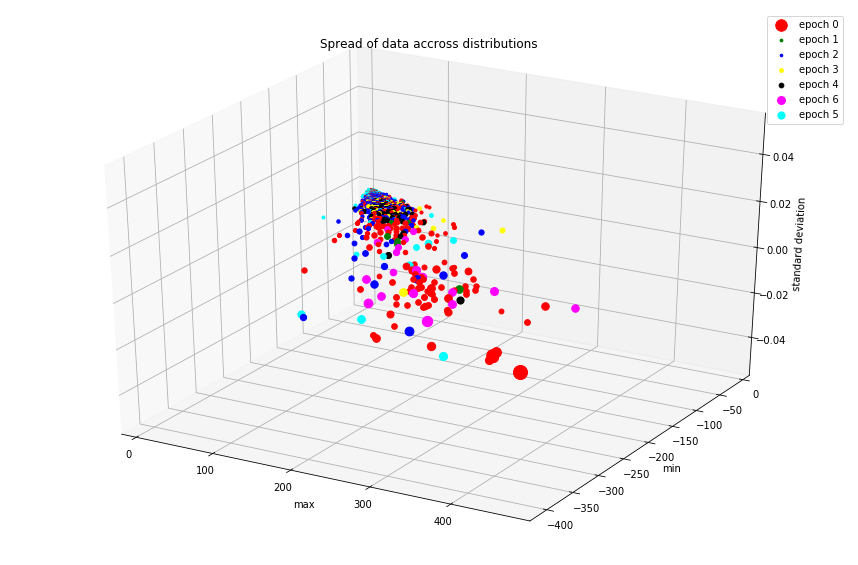

In [7]:
from scipy.interpolate import interp1d

# m = interp1d([epoch_ZCR.min(), epoch_ZCR.max()],[-0.05,0.05])
# n = interp1d([epoch_skewness.min(), epoch_skewness.max()],[-0.05,0.05])

fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111, projection='3d')
for idx, val in enumerate(epoch_score):
    plt.scatter(epoch_max[idx], epoch_min[idx], epoch_std[idx], c=colors[val], label=labels[val])
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())
ax.set_xlabel('max')
ax.set_ylabel('min')
ax.set_zlabel('standard deviation')
plt.title('Spread of data accross distributions')
# plt.savefig('skew_kurt')
plt.show()

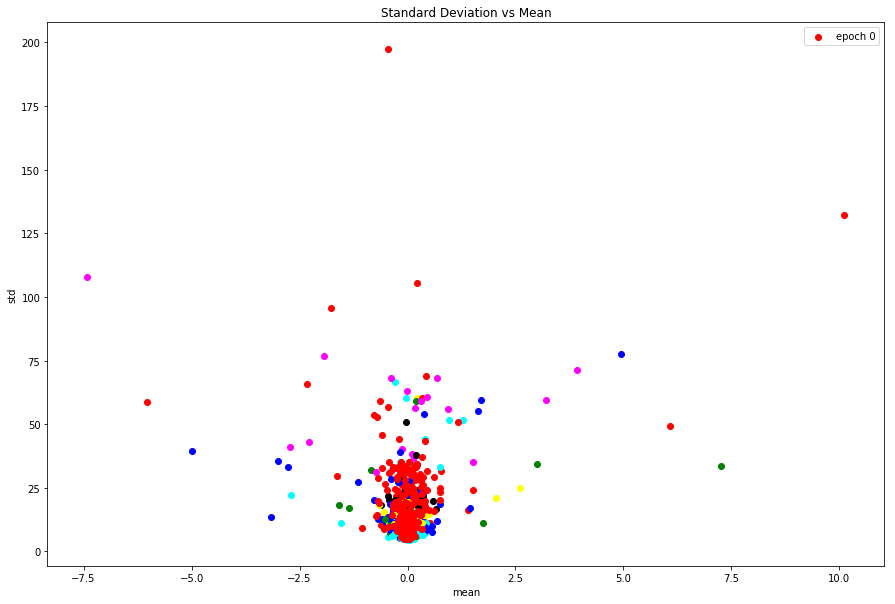

In [8]:
plt.figure(figsize = (15,10))
for idx, val in enumerate(epoch_score):
    plt.scatter(epoch_mean[idx], epoch_std[idx], c=colors[val], label=labels[val])
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlabel('mean')
plt.ylabel('std')
plt.title('Standard Deviation vs Mean')
# plt.savefig('mean_std')
plt.show()

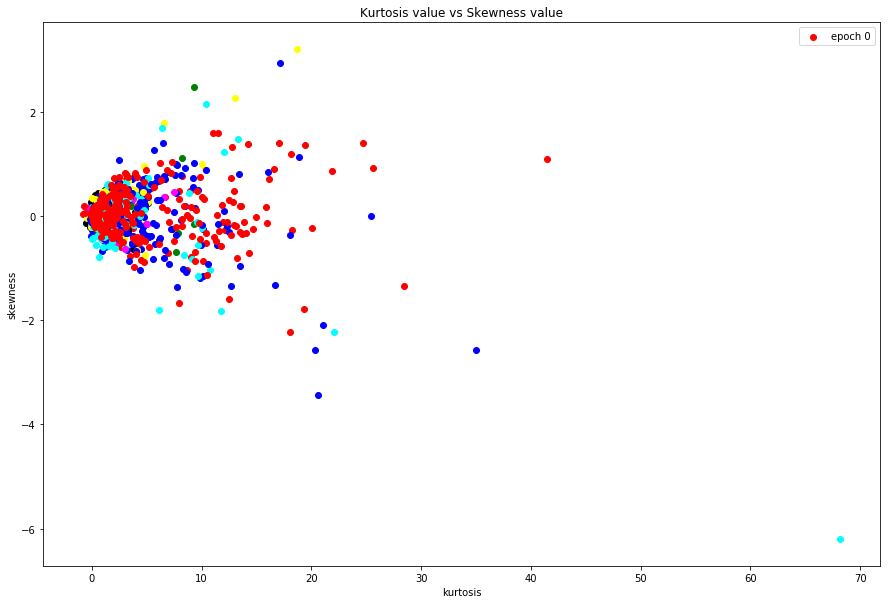

In [9]:
plt.figure(figsize = (15,10))
for idx, val in enumerate(epoch_score):
    plt.scatter(epoch_kurtosis[idx], epoch_skewness[idx], c=colors[val], label=labels[val])
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlabel('kurtosis')
plt.ylabel('skewness')
plt.title('Kurtosis value vs Skewness value')
# plt.savefig('max_min')
plt.show()

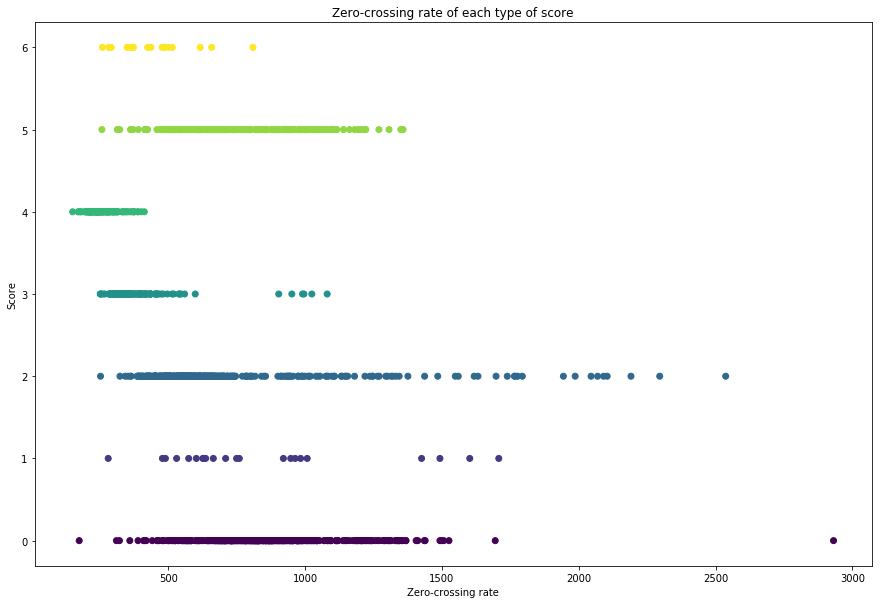

In [5]:
plt.figure(figsize = (15,10))
plt.scatter(epoch_ZCR, epoch_score, c=epoch_score)
plt.xlabel('Zero-crossing rate')
plt.ylabel('Score')
plt.title('Zero-crossing rate of each type of score')
plt.savefig('ZCR')
plt.show()